# Greetings
The [data](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-2016/) used in this notebook is the results of a survey, which were conducted amongst technology-oriented employees back in 2016. 

## Data Pre-processing 


### Data Wrangling
This section comes to take advantage of the observations gained from the previous section

Importing the required libraries

In [1]:
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

First, let's start by loading the data. 

In [2]:
# Formulating the directory 
path = Path.cwd().parent

# Loading the data
data = pd.read_csv(f'{path}/data/mental-heath-in-tech-2016_20161114.csv')
data.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [3]:
print(f"The data is formed through {data.shape[1]} columns/features and {data.shape[0]} rows/records.")

The data is formed through 63 columns/features and 1433 rows/records.


We'll start by renaming the columns into short names instead of large questions.

In [4]:
# Here are the new names of the columns 
new_columns_names = ["is_self_employed", # Are you self-employed?
                     'organization_size', # How many employees does your company or organization have?
                     'is_tech_company', # Is your employer primarily a tech company/organization?
                     'is_tech_role', # Is your primary role within your company related to tech/IT? 
                     'is_mh_benefits_provided', # Does your employer provide mental health benefits as part of healthcare coverage?
                     'is_aware_mh_care_available', # Do you know the options for mental health care available under your employer-provided coverage?
                     'is_mh_discussed_by_employer', # Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
                     'is_mh_resources_provided_by_employer', # Does your employer offer resources to learn more about mental health concerns and options for seeking help?
                     'is_anonymity_protected', # Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
                     # If a mental health issue prompted you to request a medical leave from work, asking for that leave would be 
                     'how_is_asking_for_medical_leave_due_to_mhi',
                     # Do you think that discussing a mental health disorder with your employer would have negative consequences?
                     'is_discussing_mhd_with_employer_have_negative_consequences',
                     # Do you think that discussing a physical health disorder with your employer would have negative consequences?
                     'is_discussing_phd_with_employer_have_negative_consequences',
                     # Would you feel comfortable discussing a mental health disorder with your coworkers?
                     'is_willing_to_discuss_mhi_with_colleagues',
                     # Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?
                     'is_willing_to_discuss_mhi_with_direct_supervisor',
                     # Do you feel that your employer takes mental health as seriously as physical health?
                     'is_employer_takes_mh_seriously',
                     # Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?
                     'is_aware_of_previous_negative_consequence_of_colleagues_with_mhi',
                     # Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?
                     'have_medical_coverage_includes_mental_health_issue',
                     # Do you know local or online resources to seek help for a mental health disorder?
                     'know_how_to_seek_help',
                     # If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?
                     'is_able_to_reveal_previous_mental_health_issue_to_business_contacts',
                     # If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?
                     'is_impacted_negatively_1',
                     # If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?
                     'is_able_to_reveal_previous_mental_health_issue_to_coworkers',
                     # If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?
                     'is_impacted_negatively_2',                
                     # Do you believe your productivity is ever affected by a mental health issue?
                     'is_productivity_impacted',
                     # If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?
                     'percentage_impacted',
                     # Do you have previous employers?
                     'is_previously_employed',
                     # Have your previous employers provided mental health benefits?
                     'is_previous_employer_provides_mh_benefits',
                     # Were you aware of the options for mental health care provided by your previous employers?
                     'is_aware_mh_options_by_previous_employer',
                     # Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?
                     'is_mh_discussed_by_previous_employer',
                     # Did your previous employers provide resources to learn more about mental health issues and how to seek help?
                     'is_mh_resources_provided_by_previous_employer',
                     # Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?
                     'is_anonymity_protected_by_previous_employer',
                     # Do you think that discussing a mental health disorder with previous employers would have negative consequences?
                     'is_discussing_mhd_with_previous_employer_have_negative_consequences',
                     # Do you think that discussing a physical health disorder with previous employers would have negative consequences?
                     'is_discussing_phd_with_previous_employer_have_negative_consequences',
                     # Would you have been willing to discuss a mental health issue with your previous co-workers?
                     'is_willing_to_discuss_mhi_with_previous_colleagues',
                     # Would you have been willing to discuss a mental health issue with your direct supervisor(s)?
                     'is_willing_to_discuss_mhi_with_previous_direct_supervisor',
                     # Did you feel that your previous employers took mental health as seriously as physical health?
                     'is_previous_employer_takes_mh_seriously',
                     # Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?
                     'is_aware_of_previous_negative_consequence_of_colleagues_with_mhi_in_previous_workplace',
                     # Would you be willing to bring up a physical health issue with a potential employer in an interview?
                     'is_willing_to_bring_phi_in_interview',
                     'why_or_why_not_bring_phi_in_interview',  # Why or why not?
                     # Would you bring up a mental health issue with a potential employer in an interview?
                     'is_willing_to_bring_mhi_in_interview',
                     'why_or_why_not_bring_mhi_in_interview',  # Why or why not?
                     # Do you feel that being identified as a person with a mental health issue would hurt your career?
                     'is_being_identified_with_mhi_would_hurt_your_career',
                     # Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?
                     'is_being_identified_with_mhi_would_lower_your_status_among_colleagues',
                     # How willing would you be to share with friends and family that you have a mental illness?
                     'is_wiling_to_share_about_mhi',
                     # Have you observed or experienced an unsupported or badly handled response to a mental health issue in your current or previous workplace?
                     'previously_observed_experienced_response_to_mhi',
                     # Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?
                     'is_less_encouraged_to_reveal_mhi',
                     'family_history_of_mhi',  # Do you have a family history of mental illness?
                     'previous_history_of_mhi',  # Have you had a mental health disorder in the past?
                     'is_having_mhd',  # Do you currently have a mental health disorder?
                     'diagnosed_conditions',  # If yes, what condition(s) have you been diagnosed with?
                     'suspected_conditions',  # If maybe, what condition(s) do you believe you have?
                     'diagnosed_by_professional', # Have you been diagnosed with a mental health condition by a medical professional?
                     'diagnosed_conditions_by_professional',  # If so, what condition(s) were you diagnosed with?
                     'is_sought_treatment_for_mhi', # Have you ever sought treatment for a mental health issue from a mental health professional?
                     # If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?
                     'is_mhi_interferes_with_your_work_when_treated_effectively',
                     # If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?
                     'is_mhi_does_not_interfere_with_your_work_when_treated_effectively',
                     'age',  # What is your age? 
                     'gender',  # What is your gender?
                     'country_of_residency',  # What country do you live in?'
                     'us_state_residency',  # What US state or territory do you live in?
                     'country_of_work',  # What country do you work in?
                     'us_state_work',  # What US state or territory do you work in?
                     'role_description',  # Which of the following best describes your work position?
                     'is_remote'  # Do you work remotely?
                     ]

# Setting the columns names in df
data.columns = new_columns_names
data.head()

,is_self_employed,organization_size,is_tech_company,is_tech_role,is_mh_benefits_provided,is_aware_mh_care_available,is_mh_discussed_by_employer,is_mh_resources_provided_by_employer,is_anonymity_protected,how_is_asking_for_medical_leave_due_to_mhi,...,is_mhi_interferes_with_your_work_when_treated_effectively,is_mhi_does_not_interfere_with_your_work_when_treated_effectively,age,gender,country_of_residency,us_state_residency,country_of_work,us_state_work,role_description,is_remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


As discussed, we only need to keep the data from employees and not self-employed. This would leave the feature useless, therefore, we'll remove it as well.

In [5]:
# Keeping only the rows containing data about employees
raw_df = data[data["is_self_employed"] == 0]

# Removing the feature
df = raw_df.drop(columns=["is_self_employed"], axis=1)

# Overview of the new data
df.head()

,organization_size,is_tech_company,is_tech_role,is_mh_benefits_provided,is_aware_mh_care_available,is_mh_discussed_by_employer,is_mh_resources_provided_by_employer,is_anonymity_protected,how_is_asking_for_medical_leave_due_to_mhi,is_discussing_mhd_with_employer_have_negative_consequences,...,is_mhi_interferes_with_your_work_when_treated_effectively,is_mhi_does_not_interfere_with_your_work_when_treated_effectively,age,gender,country_of_residency,us_state_residency,country_of_work,us_state_work,role_description,is_remote
0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
4,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
5,More than 1000,1.0,NaN,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,...,Not applicable to me,Often,42,Male,United Kingdom,NaN,United Kingdom,NaN,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes


Addressing these missing values will help narrow the dataset into only the respondents we seek their responses.

In [6]:
# Let's fill the NaN values with undefined
df["is_tech_role"].replace(np.nan, "undefined", inplace=True)

# The count of our values 0,1, and undefined
df["is_tech_role"].value_counts()

is_tech_role
undefined    883
1.0          248
0.0           15
Name: count, dtype: int64

Based on the role description column, the following list was created containing only non-IT-related roles.

In [7]:
non_it_roles = ['Other', 'Supervisor/Team Lead', 'Executive Leadership', 'Support', 'Designer', 'Other|HR',
                'One-person shop', 'Sales', 'HR', 'Other|Support', 'Supervisor/Team Lead|Executive Leadership',
                'Executive Leadership|Supervisor/Team Lead', 'Other|Supervisor/Team Lead', 'Other|Executive Leadership',
                'Designer|Support|Supervisor/Team Lead', 'Supervisor/Team Lead|Sales', 'Designer|Supervisor/Team Lead',
                'Support|Sales|Designer', 'HR|Supervisor/Team Lead|Executive Leadership', 'Supervisor/Team Lead|Other',
                'Executive Leadership|Supervisor/Team Lead|Designer', 'Executive Leadership|Supervisor/Team Lead|Sales'
                ]

Next, we're iterating over the whole dataset and evaluate the roles then assigning if the roles are IT-related or not.

In [8]:
# Filling the values with 0 or 1 based on the role's description
for i in range(1146):
    if df.iloc[i, 2] == "undefined" and df.iloc[i, 60] in non_it_roles:
        df.iloc[i, 2] = 0
    else:
        df.iloc[i, 2] = 1

# Transforming the column data type into integer
df["is_tech_role"] = df["is_tech_role"].astype(int)

# Viewing the end-results
df["is_tech_role"].value_counts()

is_tech_role
1    948
0    198
Name: count, dtype: int64

Consecutively, we'll see the type of companies the respondents work for through a pie chart

In [9]:
# Setting the dataframe raw_1 and the list raw_list_1
raw_1 = df[["is_tech_role", "is_tech_company"]].value_counts().reset_index()

list_1 = ["Employees with IT-related role in an IT related company", 
          "Employees with IT-related role in a non-IT related company", 
          "Employees with non-IT-related role in an IT related company"
          ]

# Selecting only 2 columns
raw_2 = raw_1.iloc[:, 1:]

# Assigning new columns names and values
raw_2.columns = ["Categories", "Count"]
raw_2["Categories"] = list_1

# Print the dataframe raw_2
raw_2.head()

,Categories,Count
0,Employees with IT-related role in an IT relate...,685
1,Employees with IT-related role in a non-IT rel...,263
2,Employees with non-IT-related role in an IT re...,198


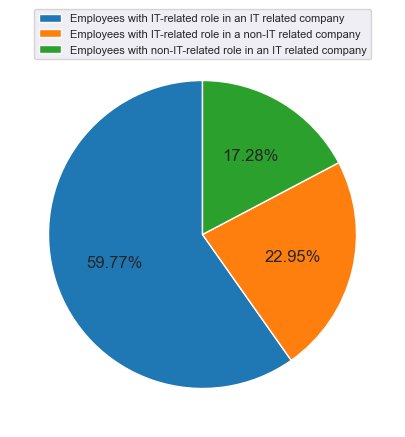

In [10]:
# Setting the style of the visuals
plt.style.use('fast')

# Starting fig1 and ax1 subplots objects
fig1, ax = plt.subplots(figsize=(15, 5))
ax.pie(
    raw_2["Count"].to_list(),  # List of values
    startangle=90, 
    autopct='%1.2f%%',  # Showing 3 numbers after the decimal point 
    textprops={'fontsize': 12}  # Setting the size of the ratios 
)

# Setting the legend parameters
ax.legend(
    labels=raw_2["Categories"].to_list(),  # List of labels
    loc="upper center",  # Position of the legend
    bbox_to_anchor=(0.5, 1.1),
    fontsize=8)  # Size of the legend

# Plotting the figure
plt.show()

Since we consider only records of employees in IT-related roles, the remaining records shall be excluded.

In [11]:
# Selecting only IT-related roles
df = df[df["is_tech_role"] == 1]

# Dropping the is_tech_role column
df.drop(columns=["is_tech_role"], inplace=True)

# Printing the dataframe df
df.head()

,organization_size,is_tech_company,is_mh_benefits_provided,is_aware_mh_care_available,is_mh_discussed_by_employer,is_mh_resources_provided_by_employer,is_anonymity_protected,how_is_asking_for_medical_leave_due_to_mhi,is_discussing_mhd_with_employer_have_negative_consequences,is_discussing_phd_with_employer_have_negative_consequences,...,is_mhi_interferes_with_your_work_when_treated_effectively,is_mhi_does_not_interfere_with_your_work_when_treated_effectively,age,gender,country_of_residency,us_state_residency,country_of_work,us_state_work,role_description,is_remote
0,26-100,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,6-25,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,No,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
4,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
5,More than 1000,1.0,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,...,Not applicable to me,Often,42,Male,United Kingdom,NaN,United Kingdom,NaN,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes


Standardization can be applied to some columns in our dataset. Organization_size is a good candidate for this process.

In [12]:
# Adjusting the categories of organization_size
df['organization_size'] = df['organization_size'].replace(
    {'1-5': 'Less than 5',
     '6-25': 'Between 6 and 25',
     '26-100': 'Between 26 and 100',
     '100-500': 'Between 101 and 500',
     '500-1000': 'Between 501 and 1000'
     }
)

# Demonstrating the number of occurrences 
df['organization_size'].value_counts()

organization_size
Between 26 and 100      249
More than 1000          223
Between 101 and 500     194
Between 6 and 25        172
Between 501 and 1000     60
Less than 5              50
Name: count, dtype: int64

To ensure data quality, Data transformation is applied on the data. 

In [13]:
# Transforming this column from float64 into binary int64
df['is_tech_company'] = df['is_tech_company'].astype(int)

# Transforming this column from a text into int64
df[['is_aware_of_previous_negative_consequence_of_colleagues_with_mhi', 'diagnosed_by_professional']] = df[
    ['is_aware_of_previous_negative_consequence_of_colleagues_with_mhi', 'diagnosed_by_professional']].replace(
    ["Yes", "No"], [1, 0])

# Print the dataframe
df.head()

,organization_size,is_tech_company,is_mh_benefits_provided,is_aware_mh_care_available,is_mh_discussed_by_employer,is_mh_resources_provided_by_employer,is_anonymity_protected,how_is_asking_for_medical_leave_due_to_mhi,is_discussing_mhd_with_employer_have_negative_consequences,is_discussing_phd_with_employer_have_negative_consequences,...,is_mhi_interferes_with_your_work_when_treated_effectively,is_mhi_does_not_interfere_with_your_work_when_treated_effectively,age,gender,country_of_residency,us_state_residency,country_of_work,us_state_work,role_description,is_remote
0,Between 26 and 100,1,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,Between 6 and 25,1,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,Between 6 and 25,1,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,No,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
4,Between 6 and 25,0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
5,More than 1000,1,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,...,Not applicable to me,Often,42,Male,United Kingdom,NaN,United Kingdom,NaN,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes


In [14]:
# Initiating an empty list data_info 
data_info = []

# Gathering the attributes in one place 
for index, column in enumerate(df.columns):
    info = {
        'name': column,                                 # The name of the column 
        'empty_values': df[column].isna().sum(),      # The number of empty values in a column
        'data_type': df[column].dtypes                # The data type of column
    }

    # Filtering to only include features containing empty values  
    data_info.append(info)

# Create a DataFrame from the gathered information
null_categories_data = pd.DataFrame(data_info).sort_values(by=['empty_values'], ascending=False)
null_categories_data

,name,empty_values,data_type
20,is_productivity_impacted,948,object
14,have_medical_coverage_includes_mental_health_i...,948,float64
21,percentage_impacted,948,object
19,is_impacted_negatively_2,948,object
18,is_able_to_reveal_previous_mental_health_issue...,948,object
...,...,...,...
1,is_tech_company,0,int32
34,is_willing_to_bring_phi_in_interview,0,object
36,is_willing_to_bring_mhi_in_interview,0,object
38,is_being_identified_with_mhi_would_hurt_your_c...,0,object


In [15]:
# Storing these columns in a list called: to_be_deleted
to_be_deleted = list(null_categories_data[null_categories_data["empty_values"] == 948].iloc[:, 0])
to_be_deleted

['is_productivity_impacted',
 'have_medical_coverage_includes_mental_health_issue',
 'percentage_impacted',
 'is_impacted_negatively_2',
 'is_able_to_reveal_previous_mental_health_issue_to_coworkers',
 'is_impacted_negatively_1',
 'is_able_to_reveal_previous_mental_health_issue_to_business_contacts',
 'know_how_to_seek_help']

In [16]:
# Using the list to_be_deleted to drop empty columns
df.drop(columns=to_be_deleted, axis=1, inplace=True)

# Drop text columns with no rewarding piece of information
df.drop(["why_or_why_not_bring_phi_in_interview", "why_or_why_not_bring_mhi_in_interview"], axis=1, inplace=True)

# 
df.head()

,organization_size,is_tech_company,is_mh_benefits_provided,is_aware_mh_care_available,is_mh_discussed_by_employer,is_mh_resources_provided_by_employer,is_anonymity_protected,how_is_asking_for_medical_leave_due_to_mhi,is_discussing_mhd_with_employer_have_negative_consequences,is_discussing_phd_with_employer_have_negative_consequences,...,is_mhi_interferes_with_your_work_when_treated_effectively,is_mhi_does_not_interfere_with_your_work_when_treated_effectively,age,gender,country_of_residency,us_state_residency,country_of_work,us_state_work,role_description,is_remote
0,Between 26 and 100,1,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,Between 6 and 25,1,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,Between 6 and 25,1,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,No,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
4,Between 6 and 25,0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
5,More than 1000,1,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,...,Not applicable to me,Often,42,Male,United Kingdom,NaN,United Kingdom,NaN,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes


In the following columns, we shall proceed on filling missing values using uncertainty options available in the columns as unique values.

In [19]:
#  Filling the missing values with the appropriate unique values
df[
    'is_aware_mh_care_available'].fillna(
    'I am not sure', inplace=True)

# Replacing the missing values
df[
    'previously_observed_experienced_response_to_mhi'].fillna(
    "Maybe/Not sure", inplace=True)
df[
    'is_less_encouraged_to_reveal_mhi'].fillna(
    "Maybe", inplace=True)


previously_observed_experienced_response_to_mhi  is_less_encouraged_to_reveal_mhi
No                                               Maybe                               417
Maybe/Not sure                                   Maybe                               149
                                                 No                                   91
Yes, I observed                                  Yes                                  68
                                                 Maybe                                50
Yes, I experienced                               Maybe                                41
                                                 Yes                                  37
Yes, I observed                                  No                                   36
Maybe/Not sure                                   Yes                                  32
Yes, I experienced                               No                                   27
Name: count, dtype: int64

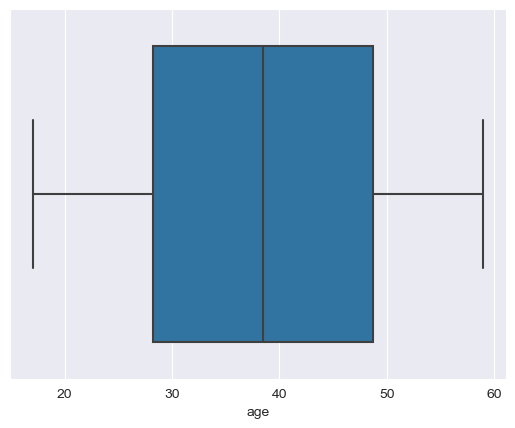

In [40]:
# 
df.loc[(df['age'] > 60), 'age'] = df.loc[(df['age'] < 17), 'age'] = df["age"].median()

rico = pd.DataFrame(df['age'].value_counts()).reset_index()

# 
sns.boxplot(data=rico, x='age')

plt.show()

In [41]:
# Reassigning the values to Male, Female, or Other
df['gender'].replace(
    ['male', 'm', 'M', 'Male (cis)', 'cisdude', 'Dude', 'Male.', 'Cis male', 'Cis Male', 'cis male', 'cis man', 'mail',
     'Male (trans, FtM)', 'Male/genderqueer', 'Malr', 'Man', 'Sex is male', 'man', 'male ', 'M|', 'Male ', 'MALE',
     'Male (trans, FtM)',
     'I\'m a man why didn\'t you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? '
     ],
    'Male', inplace=True)

df['gender'].replace(
    ['Female', 'female', 'I identify as female.', 'female ', 'Female assigned at birth ', 'Cis female ', 'F', 'Woman',
     'Transitioned, M2F', 'Female or Multi-Gender Femme', 'woman', 'female/woman', 'Cisgender Female', 'fm', 'f',
     'fem', ' Female', 'Cis-woman', 'Female ', 'Female (props for making this a freeform field, though)',
     ],
    'Female', inplace=True)

df['gender'].replace(
    ['Genderfluid (born female)', 'female-bodied; no feelings about gender', 'non-binary', 'AFAB', 'Agender',
     'genderqueer',
     'Genderflux demi-girl', 'mtf', 'Genderqueer', 'Transgender woman', 'Other/Transfeminine', 'human', 'Queer',
     'Unicorn',
     'Androgynous', 'Fluid', 'nb masculine', 'Genderfluid', 'none of your business', 'Bigender', 'Enby',
     'genderqueer woman',
     'Nonbinary', 'male 9:1 female, roughly', 'Human', np.nan
     ],
    'Other', inplace=True)

# Overview of the transformed data
df.gender.value_counts()

gender
Male      727
Female    197
Other      24
Name: count, dtype: int64

In [55]:
def conditions_counter(column_name):
    """
    :param column_name: The name of column desired
    :return: a Dataframe containing the conditions and the number of their occurrences in the column
    """

    # Creating the list of unique values excluding empty values
    a_list = pd.DataFrame(data[column_name].value_counts()).reset_index().iloc[:, 0].to_list()

    # Creating an empty dictionary
    a_dict = dict()

    # Initiating a for-loop
    for element in a_list:
        # Inspecting the existence of a character 
        if '|' in element:
            elements = element.split("|")
            # If the condition is met
            for unit in elements:
                # Iterating each unit  
                if unit in a_dict:
                    a_dict[unit] += 1  # Augment the number if it does exist
                else:
                    a_dict[unit] = 1  # Set the number to 1 if a new occurrence is found
        else:
            if element in a_dict:
                a_dict[element] += 1
            else:
                a_dict[element] = 1

    # Turning the data stored in the dictionary into a dataframe
    dframe = pd.DataFrame(list(a_dict.items()), columns=['Condition', 'Count'])

    # The final output of the function
    return dframe

In [56]:
known_conditions = conditions_counter("diagnosed_conditions") 
known_conditions

,Condition,Count
0,"Anxiety Disorder (Generalized, Social, Phobia,...",71
1,"Mood Disorder (Depression, Bipolar Disorder, etc)",76
2,Attention Deficit Hyperactivity Disorder,38
3,Post-traumatic Stress Disorder,37
4,"Eating Disorder (Anorexia, Bulimia, etc)",17
5,Obsessive-Compulsive Disorder,26
6,Substance Use Disorder,25
7,Addictive Disorder,25
8,Stress Response Syndromes,24
9,"Psychotic Disorder (Schizophrenia, Schizoaffec...",2


In [42]:
df

,organization_size,is_tech_company,is_mh_benefits_provided,is_aware_mh_care_available,is_mh_discussed_by_employer,is_mh_resources_provided_by_employer,is_anonymity_protected,how_is_asking_for_medical_leave_due_to_mhi,is_discussing_mhd_with_employer_have_negative_consequences,is_discussing_phd_with_employer_have_negative_consequences,...,is_mhi_interferes_with_your_work_when_treated_effectively,is_mhi_does_not_interfere_with_your_work_when_treated_effectively,age,gender,country_of_residency,us_state_residency,country_of_work,us_state_work,role_description,is_remote
0,Between 26 and 100,1,Not eligible for coverage / N/A,I am not sure,No,No,I don't know,Very easy,No,No,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,Between 6 and 25,1,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,...,Rarely,Sometimes,29,Male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,Between 6 and 25,1,No,I am not sure,No,No,I don't know,Neither easy nor difficult,Maybe,No,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
4,Between 6 and 25,0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
5,More than 1000,1,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,...,Not applicable to me,Often,42,Male,United Kingdom,NaN,United Kingdom,NaN,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,Between 101 and 500,1,Yes,I am not sure,Yes,I don't know,I don't know,Somewhat easy,No,No,...,Not applicable to me,Not applicable to me,24,Male,Canada,NaN,Canada,NaN,Back-end Developer,Sometimes
1424,Between 101 and 500,1,Not eligible for coverage / N/A,I am not sure,No,No,I don't know,Somewhat difficult,Maybe,No,...,Rarely,Often,22,Female,Canada,NaN,Canada,NaN,Back-end Developer|Front-end Developer,Sometimes
1425,Between 101 and 500,1,Yes,I am not sure,Yes,Yes,Yes,Somewhat easy,No,No,...,Rarely,Rarely,24,Male,Canada,NaN,Canada,NaN,Supervisor/Team Lead|Front-end Developer|Back-...,Sometimes
1430,Between 101 and 500,1,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,Maybe,Maybe,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes


In [ ]:
# Save the cleansed dataset in the respective directory
df.to_csv(f"{path}/data/data_v2.0.csv")

### 2.4 Columns 40 to 42
There's a wide belief that mental health issues can threaten the career, and it shouldn't be discussed with anybody. In the nex few columns, we try to test the belief through what the respondents have said.

In [ ]:
# Saving the columns names in a list
columns = [
    "Do you feel that being identified as a person with a mental health issue would hurt your career?",
    "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?",
    "How willing would you be to share with friends and family that you have a mental illness?"
]

# Saving the prospected charts' titles in a list
titles = [
    "Negative impact on the career",
    "Low status probability",
    "Openness about mental health issue"
]

# Create a figure and three subplots
fig3, axes = plt.subplots(1, 3, figsize=(30, 10))

# Starting the for loop
for index, column in enumerate(columns):
    # Setting the dictionary with the relevant details
    the_dict = data[column].value_counts().to_dict()

    # Solving the categories and their values
    categories = list(the_dict.keys())
    values = [the_dict[category] for category in categories]  # Corrected

    # Plotting the chart without labels and percentages
    axes[index].pie(values, labels=None, autopct='%1.1f%%', textprops={'fontsize': 22}, startangle=90)
    axes[index].set_title(titles[index])

    # Adding legend under each chart with extra space at the bottom
    axes[index].legend(categories, loc='upper center', bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

__Insights :__
- It's made obvious that there is a tendency to believe that having mental health issues has a negative impact on the career and may lower an employee's status among its co-workers or at least uncertainty on its actual effect.
- On the other hand, there is an obvious tendency to discuss mental health issues among friends and family.

### 2.5 Columns 43 to 44

The next two columns address another aspect which is the impact of previous experience/observation of a wrongly handled mental health issue by current/previous employer. There is a noticeable number of empty values, although we'll make sure to work with the data we possess. 

In [ ]:
# Setting a subset with the two columns called new_df
new_df = data[[
    "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?",
    "Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?"
]].copy()

# Plotting the bar plot using seaborn
sns.countplot(
    x="Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?",
    hue="Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?",
    data=new_df)

# Setting labels and legend
plt.xlabel("Previous observation/experience of badly handled mental health issue")
plt.ylabel("Number of respondents")
plt.legend(title="Does it impact?")

# Showing the chart
plt.show()

__Insights__ : 
- There is an important number of empty values present in these columns which can't be known due to which reason.
- The respondents who have experienced/observed badly handled mental health issues are more likely to never reveal their mental health issues if they ever suffer one. 

### 2.6 Columns 45 to 46

In the next two columns, we try to relate the mental health issues with the family history of an employee.

In [ ]:
# Setting a subset with the two columns called new_df
new_df = data[[
    "Do you have a family history of mental illness?", 
    "Have you had a mental health disorder in the past?"
]].copy()

# Plotting the bar plot using seaborn
sns.countplot(
    x="Do you have a family history of mental illness?",
    hue="Have you had a mental health disorder in the past?",
    data=new_df)

# Setting labels and legend
plt.xlabel("Family's History of Mental Health Issues")
plt.ylabel("Number of respondents")
plt.legend(title="Previous mental health issues")

# Showing the chart
plt.show()

__Insights__ : 
- Employees who have family health issues have gone through some previous mental health issues.
- Employees who have NO family health issues don't have any past mental health illness.